# Mask R-CNN - Inspect Pothole Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

custom_WEIGHTS_PATH = "mask_rcnn_damage_0010.h5"  # TODO: update this path

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

In [2]:
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "customImages")

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_bbox_loss': 1.0, 'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [6]:
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 15
Classes: ['BG', 'damage']


## Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [8]:
# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

Loading weights  mask_rcnn_damage_0010.h5


In [9]:
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

<module 'mrcnn.visualize' from '/home/priya/Documents/AI_Apps/Mask_RCNN/mrcnn/visualize.py'>

# Run Detection on Images

Processing 1 images
image                    shape: (1024, 685, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (256, 368, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.1

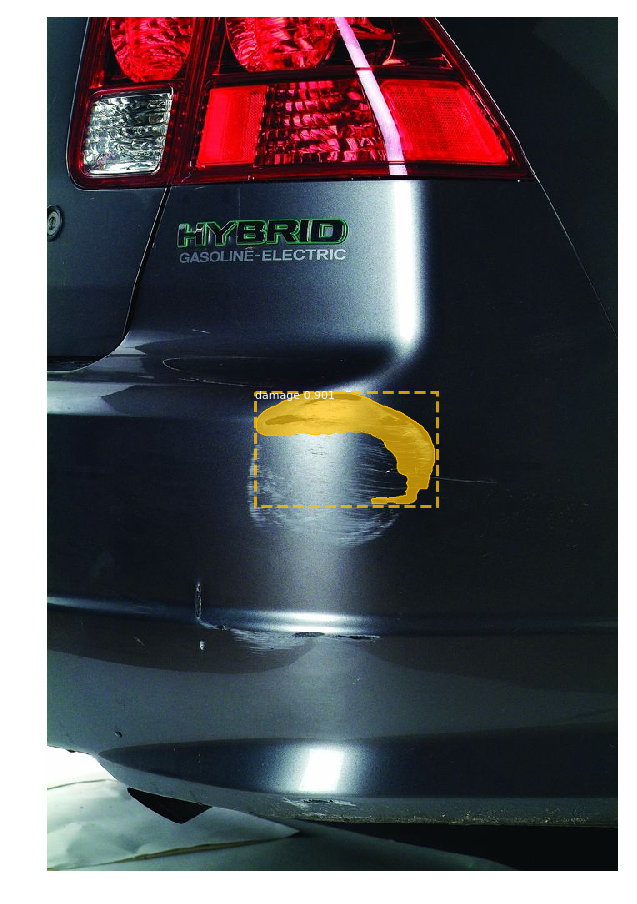

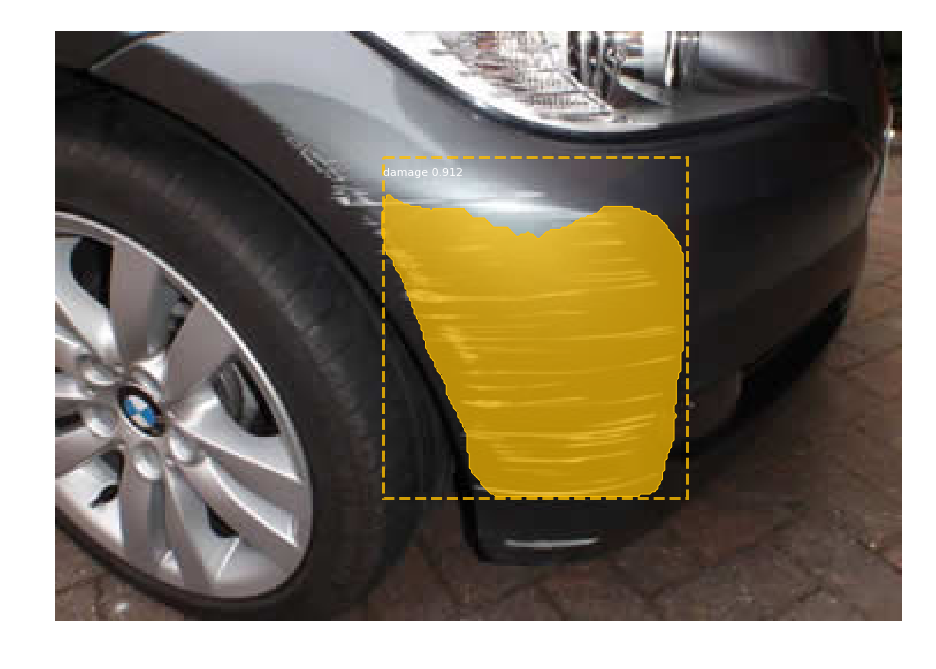

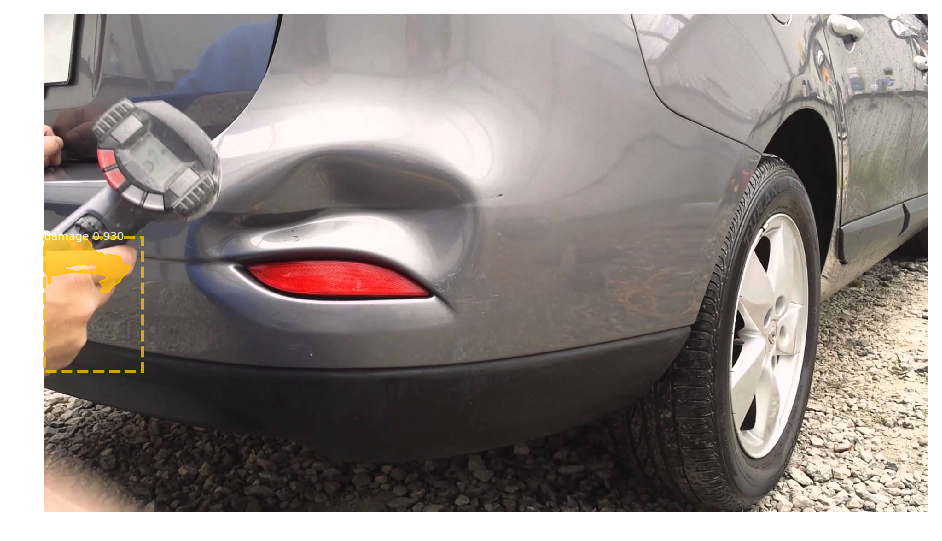

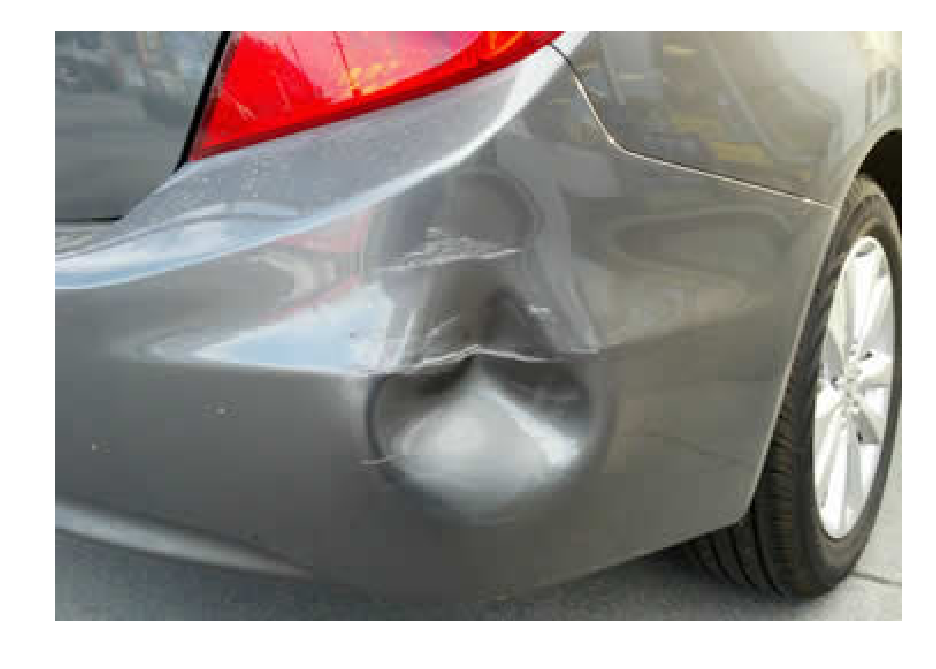

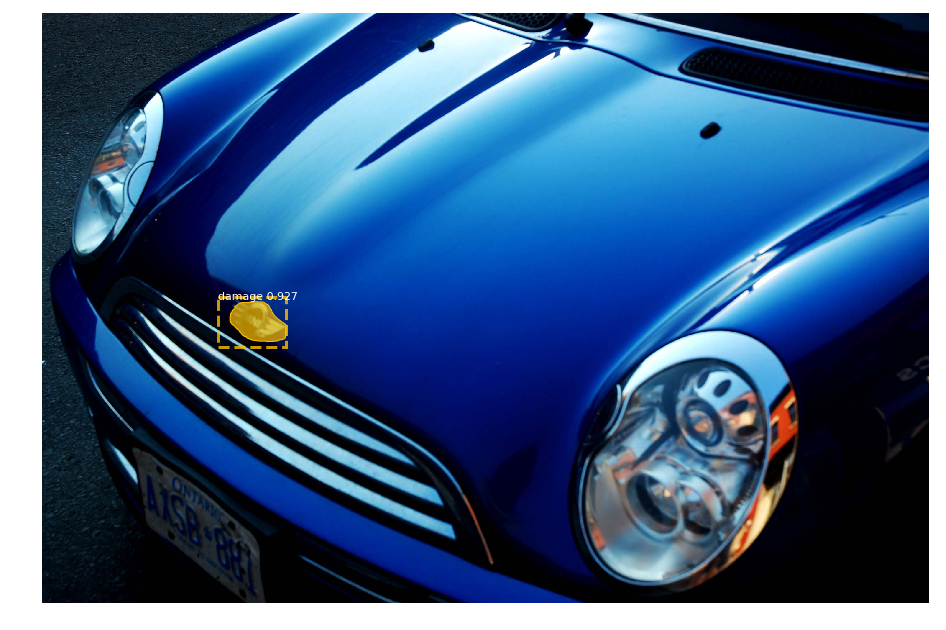

In [14]:
# Before, the was written to only run one file at a time from the validation set
# Now the model, can predict on any image given a folder, and run all in a for loop
# Also, you have the ability to insert the color of your choice, or you can have a random selection as well

custom = sorted(glob.glob('test/*.jpg'))
custom = [i for i in custom if 'masked' not in i]
custom

for pot in custom:
    image = skimage.io.imread(pot) # reads as np.array 
        # Run object detection
    results = model.detect([image], verbose=1) # calls saved model
        # Display results
    ax = get_ax(1)
    r = results[0]
    f = visualize.display_instances(image, r['rois'], r['masks'], 
                                    r['class_ids'], dataset.class_names, 
                                    r['scores'],colors = (0,191,255)[::-1], # open cv is BGR, input as RGB but reverse
                                    ax=ax,save=True,name=pot)

# Note:
    
- refer to color chart for your own color

https://www.rapidtables.com/web/color/html-color-codes.html

# Run from Command Line

In [11]:
# Before, the file applied a Splash affect on the image, which I got rid of

! python3 pothole.py detect --weights=mask_rcnn_pothole_0005.h5 --image=test/pothole13037.jpg

python3: can't open file 'pothole.py': [Errno 2] No such file or directory


In [12]:
# Before, the file applied a Splash affect on the video, which I got rid of

! python3 pothole.py detect --weights=mask_rcnn_pothole_0005.h5 --video=demo_short.mp4

# note = not able to get bounding box and confidence score in a py file, just colors

python3: can't open file 'pothole.py': [Errno 2] No such file or directory


# Mask R-CNN on video (modified), for Bounding BOX and Score

In [13]:
# only way to retain bounding box and score is:
# 1) to save the figure with info
# 2) read the figure with info
# 3) delete the figure after each video slice, dont want to crowd the hard drive

video_path = 'video/demo_short.mp4'    
vcapture = cv2.VideoCapture(video_path)
fps = vcapture.get(cv2.CAP_PROP_FPS)
width, height = 850,456 # modifying shape to the shape that is saved as plt.savfig , not the video itself.
file_name = "pothole_testing.avi"
vwriter = cv2.VideoWriter(file_name,cv2.VideoWriter_fourcc(*'MJPG'),fps, (width, height),isColor=True)

count = 0
success = True
while success:
    print("frame: ", count)
    # Read next image
    success, image = vcapture.read()
    if success:
        # OpenCV returns images as BGR, convert to RGB
        # Detect objects
        results = model.detect([image], verbose=1)  # verbose = 0 no details, 1 for details
        ax = get_ax(1)
        r = results[0]
        name = 'pothole'+str(count)+'.jpg' # using counts for original name
        f = visualize.display_instances(image, r['rois'], r['masks'], 
                                    r['class_ids'], dataset.class_names, 
                                    r['scores'], colors = (0,191,255)[::-1],
                                    ax=ax,array=True,save=True,name=name)
        naming = name.split('.')[0]+'_masked.jpg'
        file = skimage.io.imread(naming).astype('uint8')
        vwriter.write(file) # writes slice of image into the video w/ box and score
        count += 1
        os.remove(naming) # removing image after the image is processed as a video
vwriter.release() # release file into memory
print("Saved to ", file_name)

SystemError: <class 'cv2.VideoWriter'> returned a result with an error set

# Conclusion:
    
Gone through the entire process from end to end:
- labeling dataset for train / val
- training the model and saving the instance of it
- use model to predict on image
- use model to predict on video

Todo:

- more labeling
- more training, 1 or 2 days, many more epochs , only used 600 steps